### Experiment 6

To implement naive bais classifier on suitable dataset

They use principles of probability to perform classification tasks. 

It assumes that predictors in a Naïve Bayes model are conditionally independent, or unrelated to any of the other feature in the model. It also assumes that all features contribute equally to the outcome

In [1]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
# Import data
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/har_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/har_validate.csv')



In [4]:
print("Training shape:", training.shape)
print("Test shape:", test.shape)
print("\nClass distribution:\n", training['classe'].value_counts())

Training shape: (13737, 53)
Test shape: (5885, 53)

Class distribution:
 classe
A    3906
B    2658
E    2525
C    2396
D    2252
Name: count, dtype: int64


/tmp/ipykernel_6862/1867601823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classe', data=training, palette='viridis')


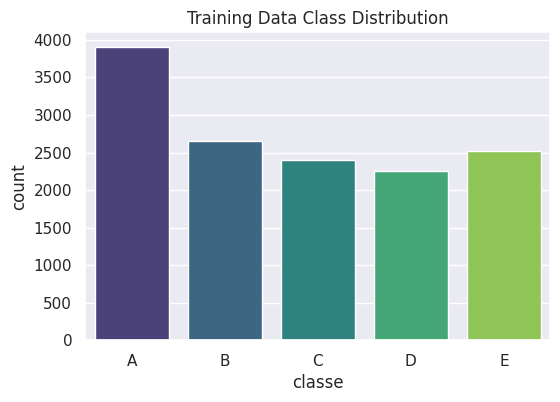

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='classe', data=training, palette='viridis')
plt.title("Training Data Class Distribution")
plt.show()


In [6]:
print("\nMissing values in training set:\n", training.isnull().sum().sum())
print("Missing values in test set:\n", test.isnull().sum().sum())


Missing values in training set:
 0
Missing values in test set:
 0


In [7]:
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [8]:
# Create the X and Y
xtrain = training.drop('classe', axis=1)
ytrain = training.loc[:, 'classe']

In [9]:
xtest = test.drop('classe', axis=1)
ytest = test.loc[:, 'classe']

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

In [11]:
# Init the Gaussian Classifier
model = GaussianNB()

In [12]:
# Train the model 
model.fit(xtrain, ytrain)

,priors,None
,var_smoothing,1e-09


In [13]:
# Prediction
pred = model.predict(xtest)
print(pred[:5])

['A' 'A' 'A' 'A' 'A']


In [14]:
print("\nFirst 10 Predictions:\n", pred[:10])
print("\nAccuracy:", accuracy_score(ytest, pred))
print("\nClassification Report:\n", classification_report(ytest, pred))



First 10 Predictions:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']

Accuracy: 0.5542905692438402

Classification Report:
               precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885



Text(109.44999999999997, 0.5, 'Predicted')

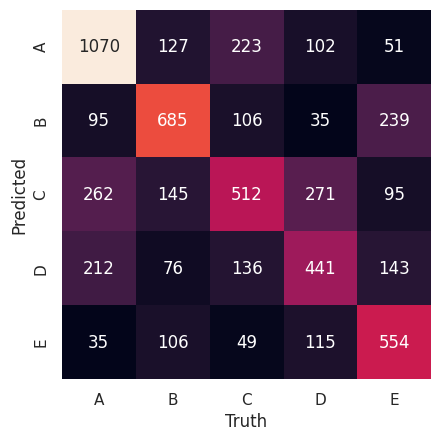

In [15]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')